In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data = np.random.randn(100).cumsum() + 100

data

array([ 98.34059912, 100.59371068, 101.87730699, 101.21754412,
       100.87628154, 100.89513632, 100.91976423, 100.91037361,
        99.60909093, 100.8118503 , 102.28496864, 102.05429864,
       100.65350822, 101.8898154 , 102.72482361, 102.75088907,
       102.69338474, 101.97728469, 102.69608945, 101.28636668,
       100.88825047,  98.31048829,  97.27348712,  98.78288728,
        98.72637769, 100.17783134,  99.99382626,  99.05710751,
        97.80369645,  97.53829722,  98.00836844,  97.43707222,
        96.81466152,  97.09861831,  97.69937243,  98.02544009,
        99.9105247 , 100.56131827,  99.88732353, 102.46526735,
       101.50013094,  98.97615427, 100.44701824, 100.80803713,
       101.23644859, 101.10155441, 102.78229211, 103.80315047,
       104.60175512, 105.74512182, 105.82717088, 105.62427586,
       105.15336213, 105.08713344, 105.55508192, 105.60725325,
       104.60896605, 103.45555098, 103.85657862, 103.15631573,
       102.3579704 , 100.83806515, 101.6509922 , 102.17

In [4]:
ts = pd.Series(data)

In [5]:
train, test = ts[:80], ts[80:]

In [6]:
model = ARIMA(train, order = (20, 3, 60))
model_fitted = model.fit()

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
predictions = model_fitted.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')
predictions

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


80    101.370976
81    101.553293
82    101.583798
83    102.967025
84    103.378531
85    103.015608
86    102.795441
87    103.015428
88    103.790322
89    101.381957
90    101.525692
91    100.526781
92    101.263187
93    101.575971
94    100.883923
95    100.868546
96    101.235537
97    101.026640
98    101.174690
99    101.858235
Name: predicted_mean, dtype: float64

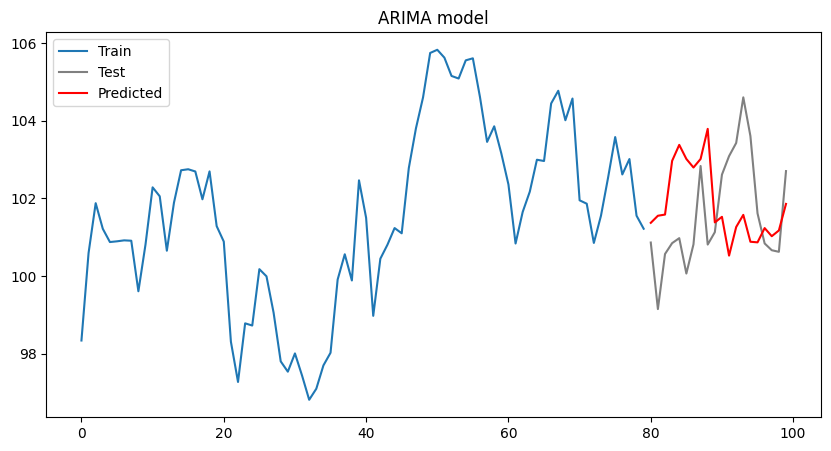

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(train, label = 'Train')
plt.plot(test.index, test, label = 'Test', color = 'gray')
plt.plot(test.index, predictions, label = 'Predicted', color = 'red')
plt.title('ARIMA model')
plt.legend()
plt.show()

# typ='levels'
# 예측 결과를 원래 값의 수준(level)으로 반환
# Linear도 쓸 수 있음 -> 예측값을 실제값이 아닌 차분된 값으로 반환할 때 씀
# 보통은 levels 사용

In [9]:
mse = mean_squared_error(ts[-20:], predictions)
print(mse)

3.4882353802954333


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

In [11]:
def AR1(c = 0, phi = 0, noise = 1, n = 100):
    noise = np.random.normal(0, noise, n)
    data = [c / (1 - phi) + noise[0]]
    for i in range(1, n):
        data.append(c + phi * data[i-1] + noise[i])
    return data

In [12]:
def show_ACF(series, title, start = 0, nlags = None):
    plt.figure(figsize = (10, 6))
    ACF = acf(series, fft = False, nlags = nlags)
    plt.bar(range(start, ACF.shape[0]), ACF[start:], color = 'black')
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.ylim(-1, 1)
    plt.title(title)
    plt.show()

In [23]:
def show_PACF(series, title, start = 1, nlags = None):
    plt.figure(figsize = (10, 6))
    PACF = pacf(series, nlags = nlags)
    plt.bar(range(start, PACF.shape[0]), PACF[start:], color = 'black')
    plt.xlabel("Lag")
    plt.ylabel("PACF")
    plt.ylim(-1, 1)
    plt.title(title)
    plt.show()

In [14]:
def plot_series(series, x_label, y_label, title):
    plt.figure(figsize = (10, 6))
    plt.plot(series, color = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [15]:
def hist_resid(res):
    plt.hist(res)
    plt.xlabel("resid")
    plt.ylabel("count")
    plt.title("residual histogram")
    plt.show()

In [16]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/global_economy.csv')

In [17]:
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format = '%Y')
egypt_exports = global_economy[global_economy['Code'] == 'EGY']
egypt_series = pd.Series(list(egypt_exports['Exports']), egypt_exports['Year'])

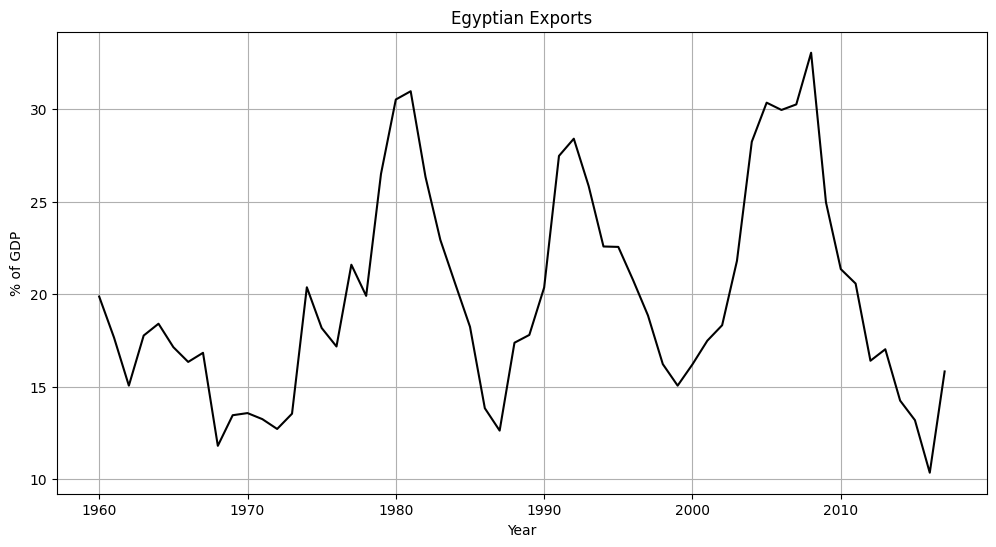

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(egypt_series, color = 'black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Egyptian Exports')
plt.grid(True)
plt.show()

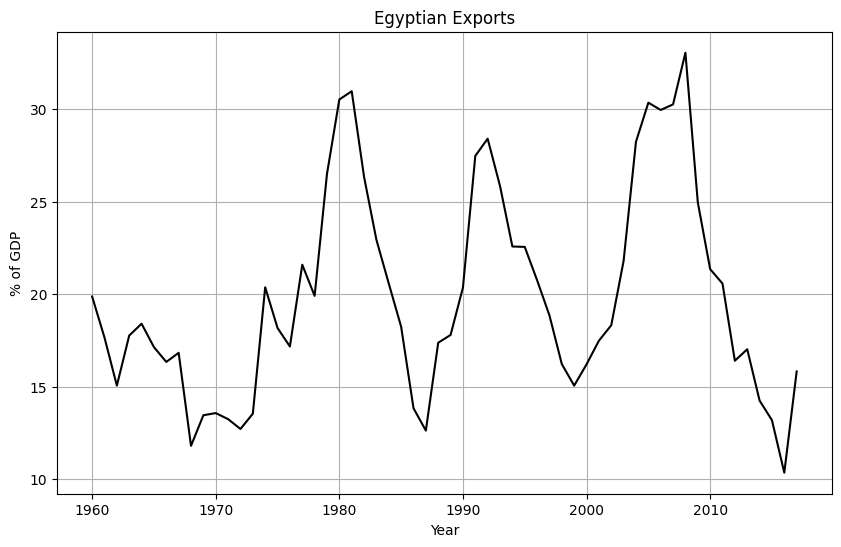

In [19]:
plot_series(egypt_series, 'Year', '% of GDP', 'Egyptian Exports')

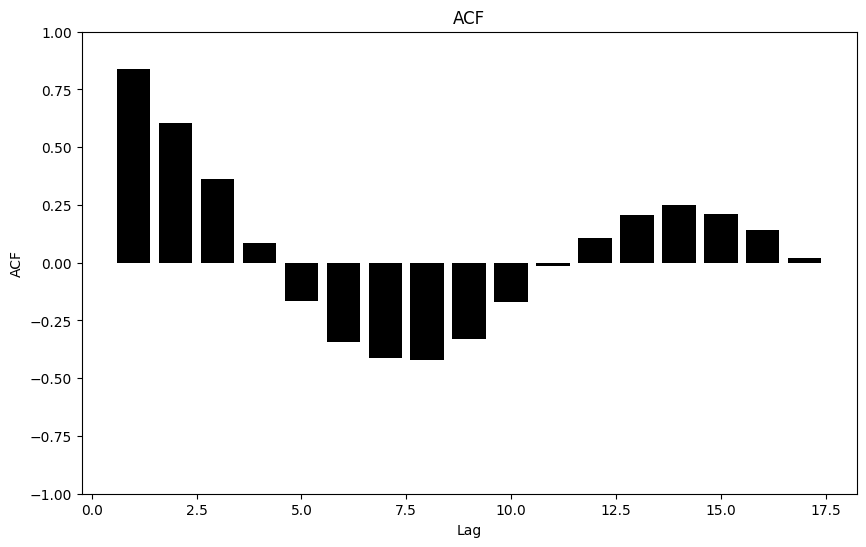

In [20]:
show_ACF(egypt_series, "ACF", 1)

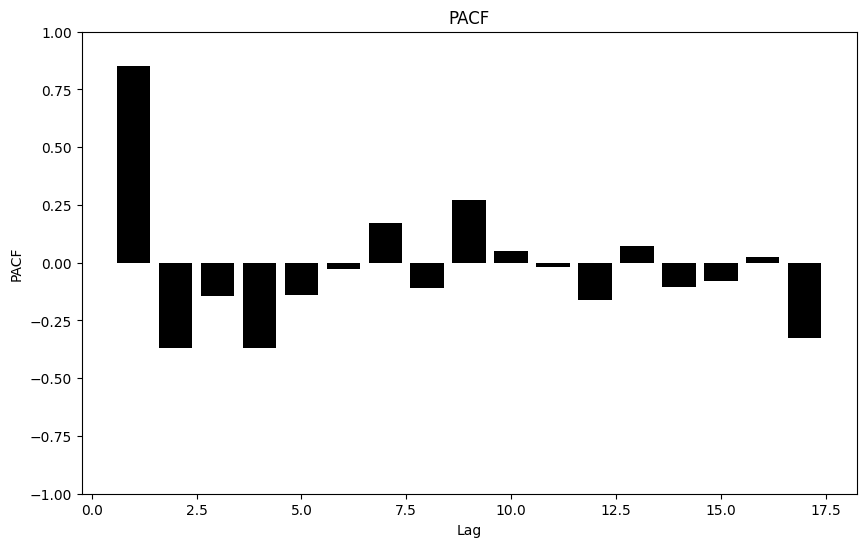

In [24]:
show_PACF(egypt_series, "PACF", 1)

In [25]:
egypt_mod = ARIMA(egypt_series, order = (2, 0, 1))
egypt_res = egypt_mod.fit()
print(egypt_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   58
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -141.566
Date:                Mon, 16 Dec 2024   AIC                            293.132
Time:                        15:39:09   BIC                            303.434
Sample:                    01-01-1960   HQIC                           297.145
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1790      0.972     20.766      0.000      18.274      22.084
ar.L1          1.6764      0.127     13.239      0.000       1.428       1.925
ar.L2         -0.8034      0.102     -7.905      0.0

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [37]:
egypt_res.resid

Year
1960-01-01   -0.312849
1961-01-01   -2.271704
1962-01-01   -2.416005
1963-01-01    2.605013
1964-01-01   -0.111110
1965-01-01   -2.082177
1966-01-01   -1.590964
1967-01-01   -0.448216
1968-01-01   -6.155814
1969-01-01    0.385133
1970-01-01   -1.801173
1971-01-01   -2.500565
1972-01-01   -2.874345
1973-01-01   -1.678649
1974-01-01    4.168252
1975-01-01   -4.790114
1976-01-01   -2.792329
1977-01-01    2.914620
1978-01-01   -3.044393
1979-01-01    5.807129
1980-01-01    3.534276
1981-01-01    0.965323
1982-01-01   -2.952269
1983-01-01   -0.937161
1984-01-01    0.072953
1985-01-01   -0.340926
1986-01-01   -3.001671
1987-01-01   -0.553120
1988-01-01    4.380456
1989-01-01   -0.728891
1990-01-01    1.417851
1991-01-01    6.052992
1992-01-01    0.316236
1993-01-01   -2.044944
1994-01-01   -1.901850
1995-01-01    1.593890
1996-01-01   -0.381095
1997-01-01   -0.652931
1998-01-01   -1.714439
1999-01-01   -0.737263
2000-01-01    0.923456
2001-01-01    0.487206
2002-01-01   -0.197661
2003-0

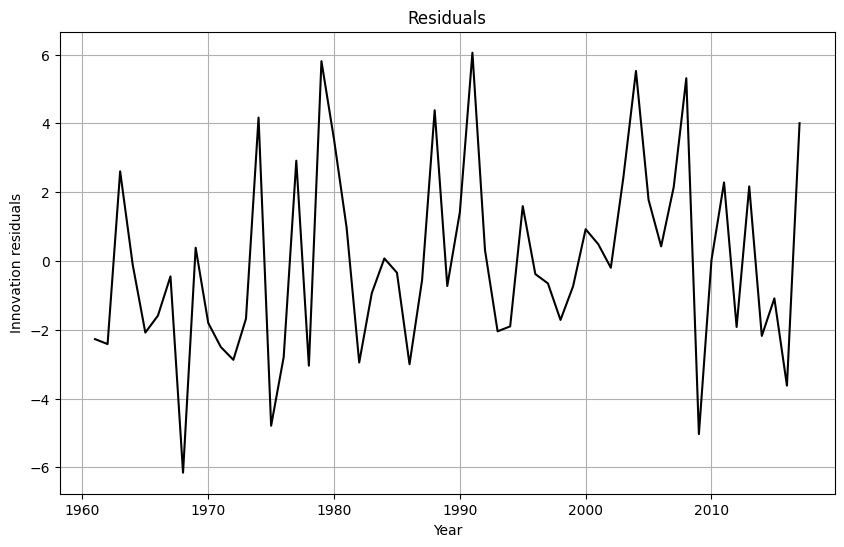

In [26]:
plot_series(egypt_res.resid[1:], "Year", "Innovation residuals", "Residuals")

In [ ]:
!pip install chart_studio

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from chart_studio import plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import os

plt.style.use('ggplot')

In [35]:
weather_station_location = pd.read_csv('./Weather Station Locations.csv')
weather = pd.read_csv('./Summary of Weather.csv')
# weather_station_location = weather_station_location.loc[:,
                                            # ["WBAN", "NAME", "STATE/COUNTRY ID", "Latitude", "Longitude"]]
weather_station_location = weather_station_location[["WBAN", "NAME", "STATE/COUNTRY ID", "Latitude", "Longitude"]]
weather = weather.loc[:, ["STA", "Date", "MeanTemp"]]
weather_station_location.head()



C:\Users\82102\AppData\Local\Temp\ipykernel_2544\3044295405.py:2: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333


In [36]:
weather.head()

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444


In [38]:
weather_station_id = weather_station_location[weather_station_location.NAME == 'BINDUKURI'].WBAN
weather_bin = weather[weather.STA == int(weather_station_id)]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
weather_bin

C:\Users\82102\AppData\Local\Temp\ipykernel_2544\414185706.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


In [39]:
weather_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       751 non-null    int64         
 1   Date      751 non-null    datetime64[ns]
 2   MeanTemp  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB


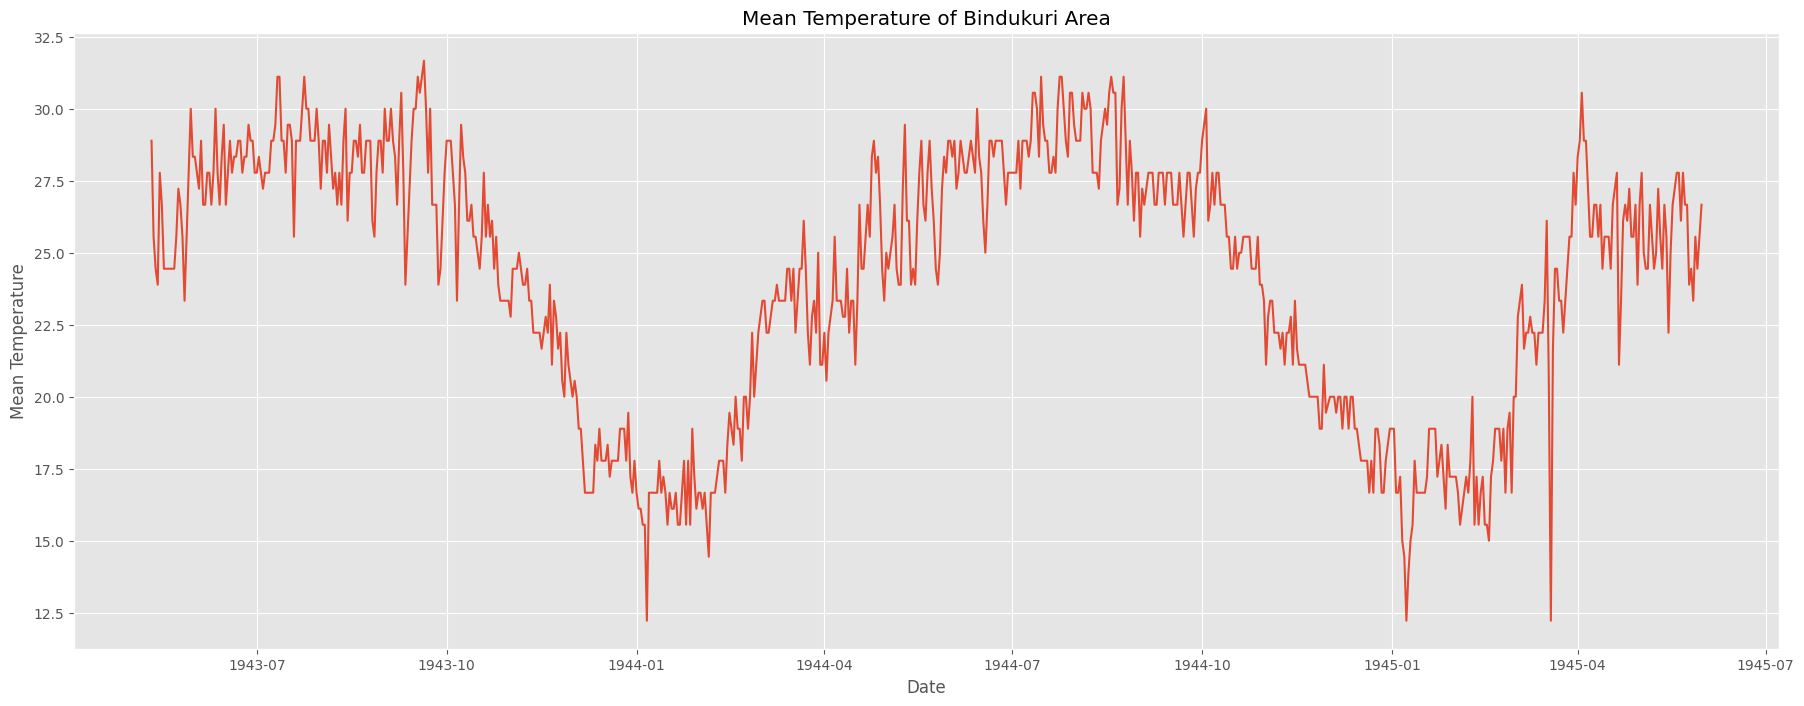

In [41]:
plt.figure(figsize = (22, 8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [44]:
timeSeries = weather_bin.loc[:, ["Date", "MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis = 1)
ts[200:230]

,MeanTemp
Date,
1943-11-27,20.000000
1943-11-28,22.222222
1943-11-29,21.111111
1943-11-30,20.555556
1943-12-01,20.000000
1943-12-02,20.555556
1943-12-03,20.000000
1943-12-04,18.888889
1943-12-05,18.888889


<Figure size 640x480 with 0 Axes>

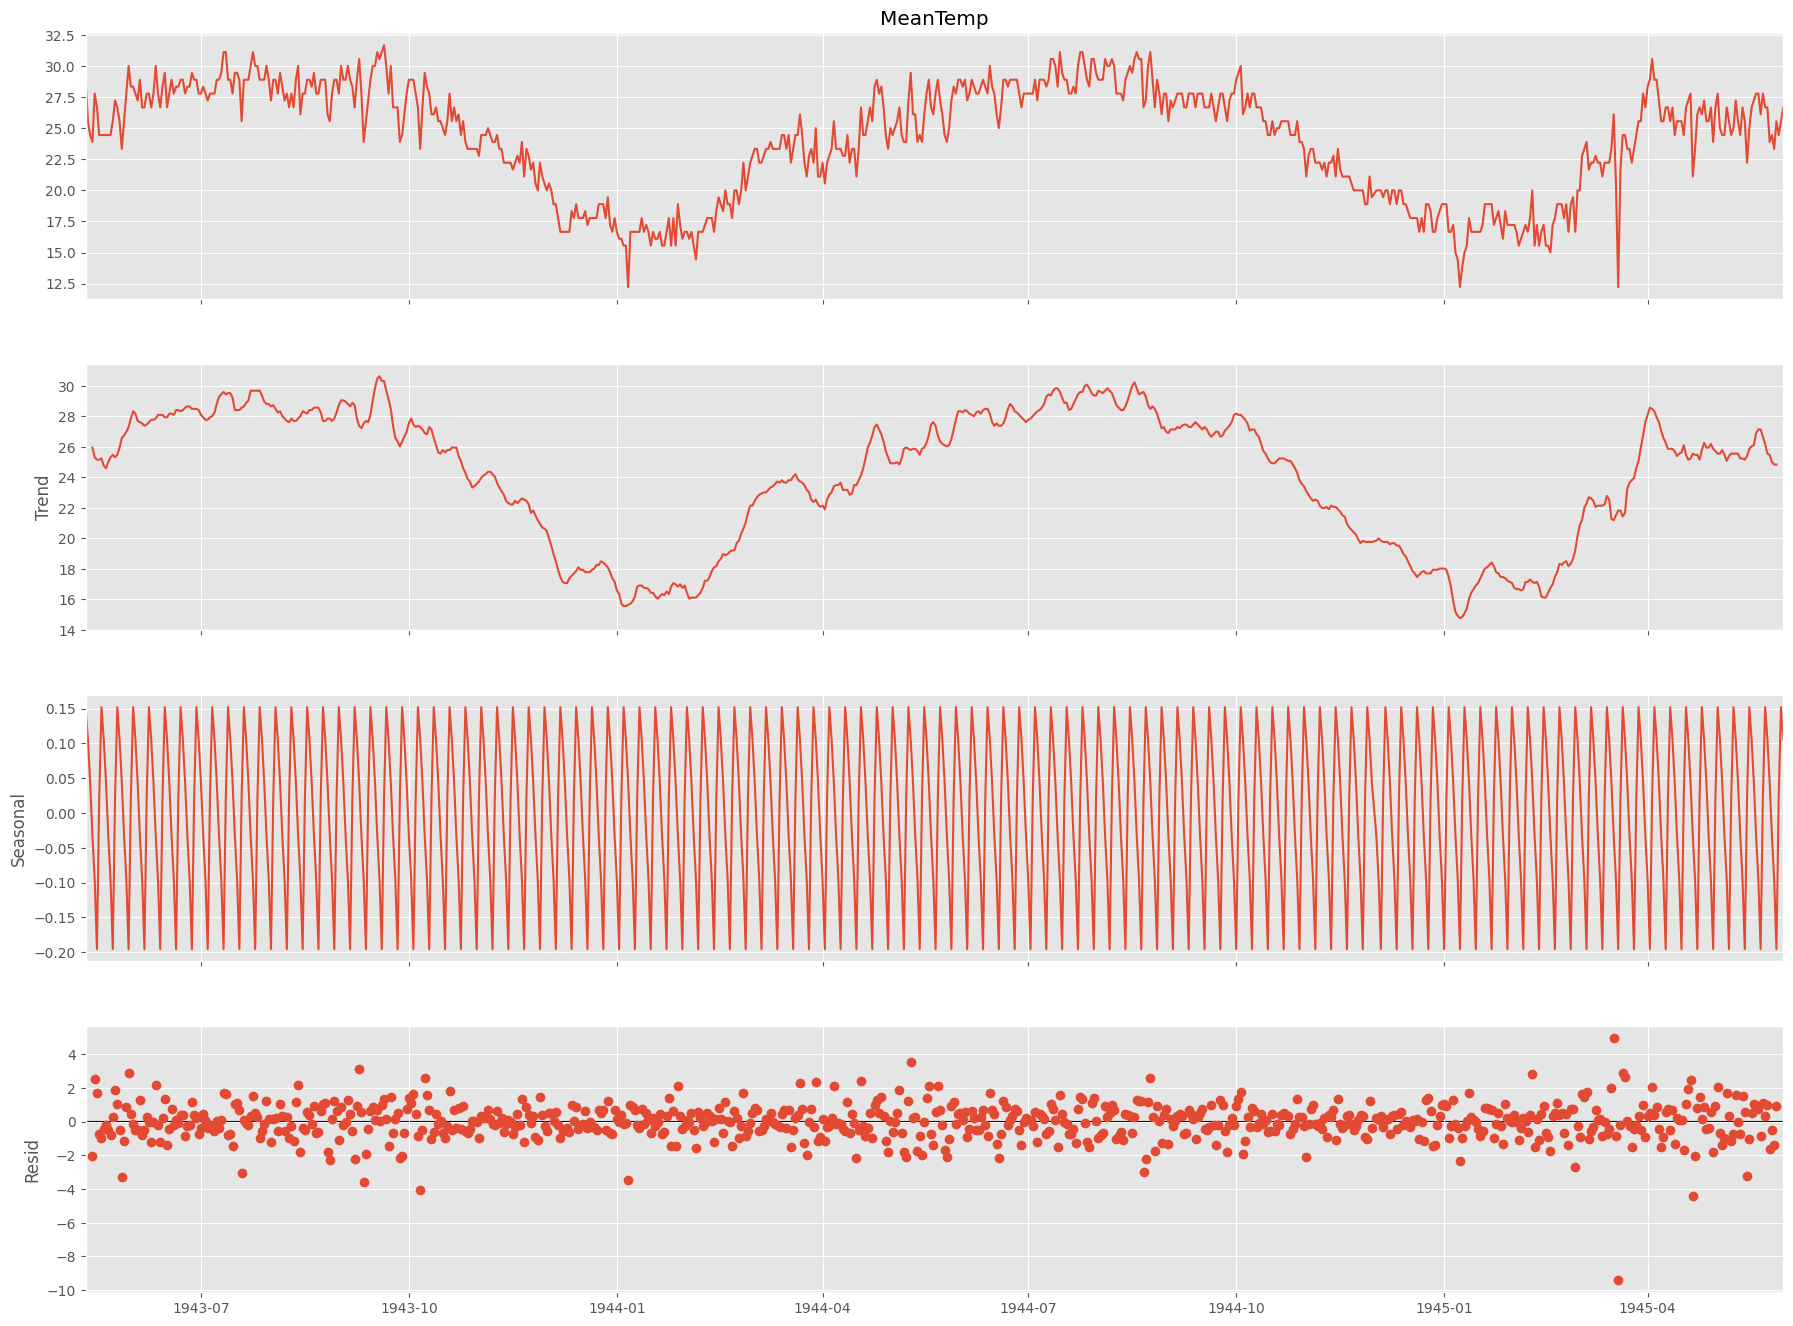

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
# additive(계절성 진폭이 평균과 독립적일때), multiplicative(계절성 진폭이 평균에 따라 달라질 때)
result = seasonal_decompose(ts["MeanTemp"], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

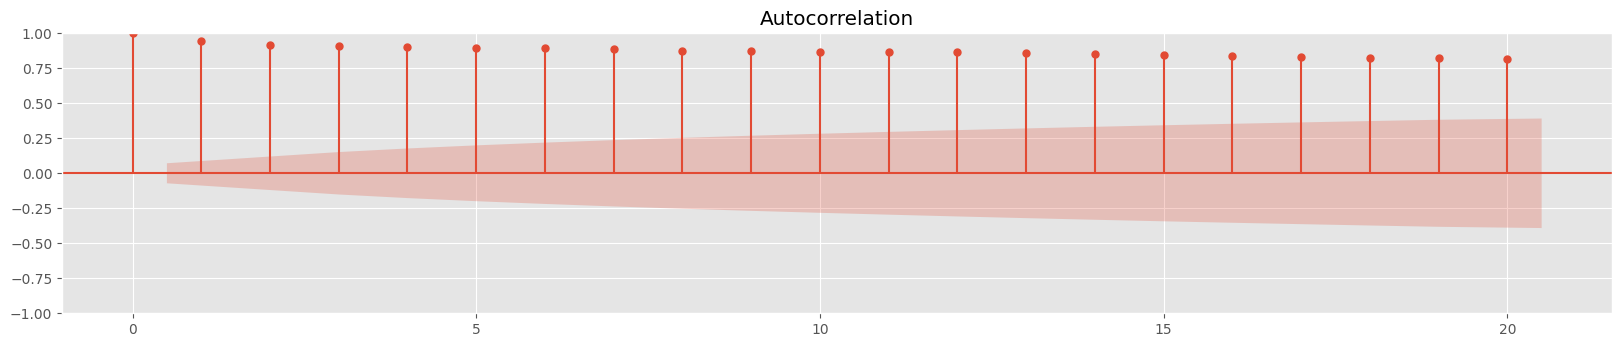

In [48]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [49]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts) # ADF 검정 (Augmented Dickey-Fuller Test)
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values : ')
for key, value in result[4].items():
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -1.409597
p-value : 0.577667
Critical Values : 
	1% : -3.439
	5% : -2.865
	10% : -2.569


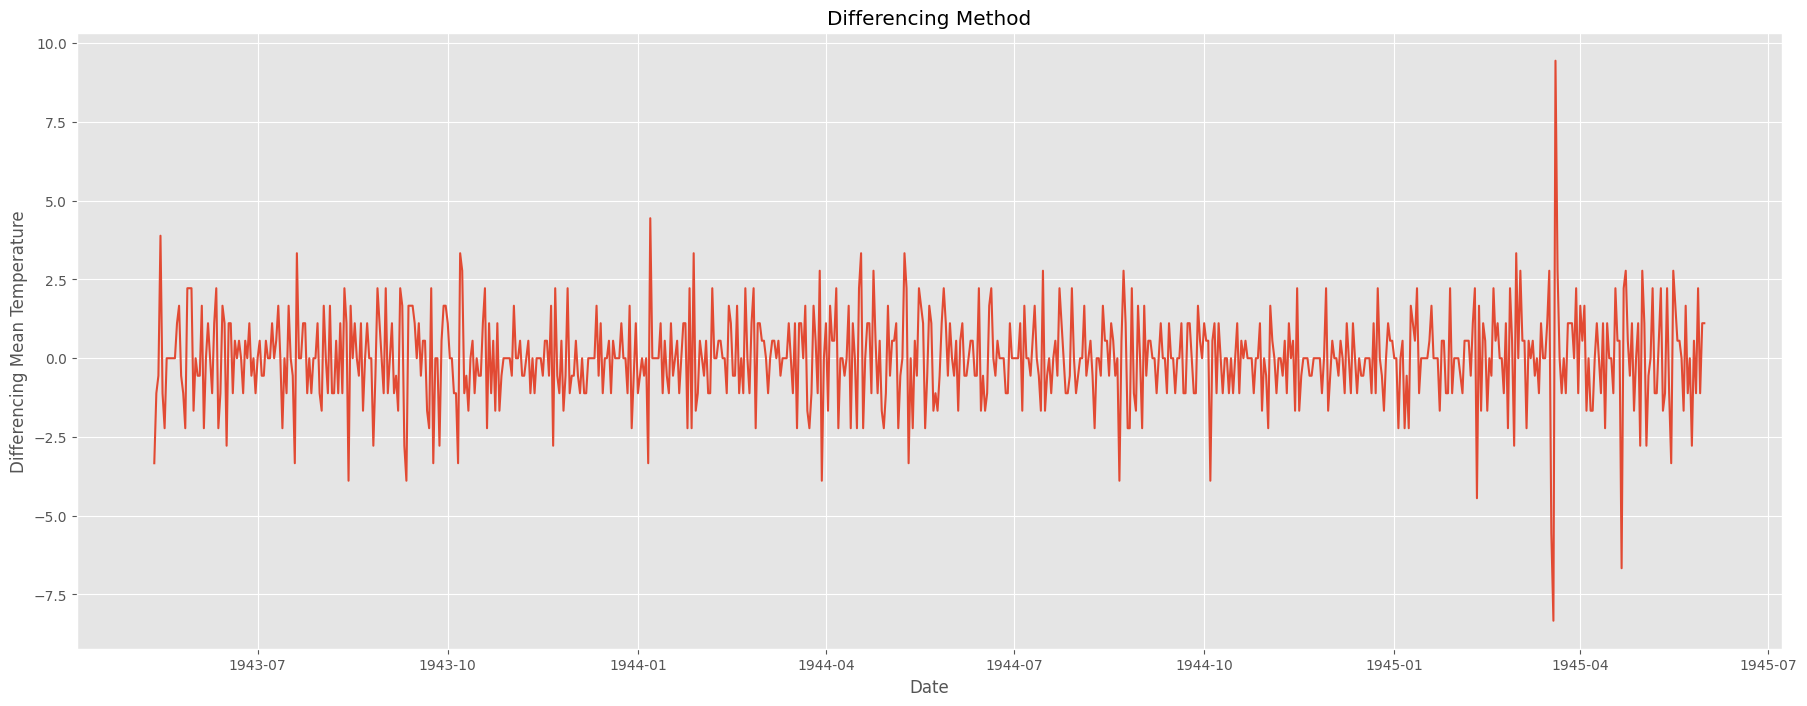

In [50]:
ts_diff = ts - ts.shift()
plt.figure(figsize = (22, 8))
plt.plot(ts_diff)
plt.title("Differencing Method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [51]:
result = adfuller(ts_diff[1:])
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values : ')
for key, value in result[4].items():
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -11.678956
p-value : 0.000000
Critical Values : 
	1% : -3.439
	5% : -2.865
	10% : -2.569


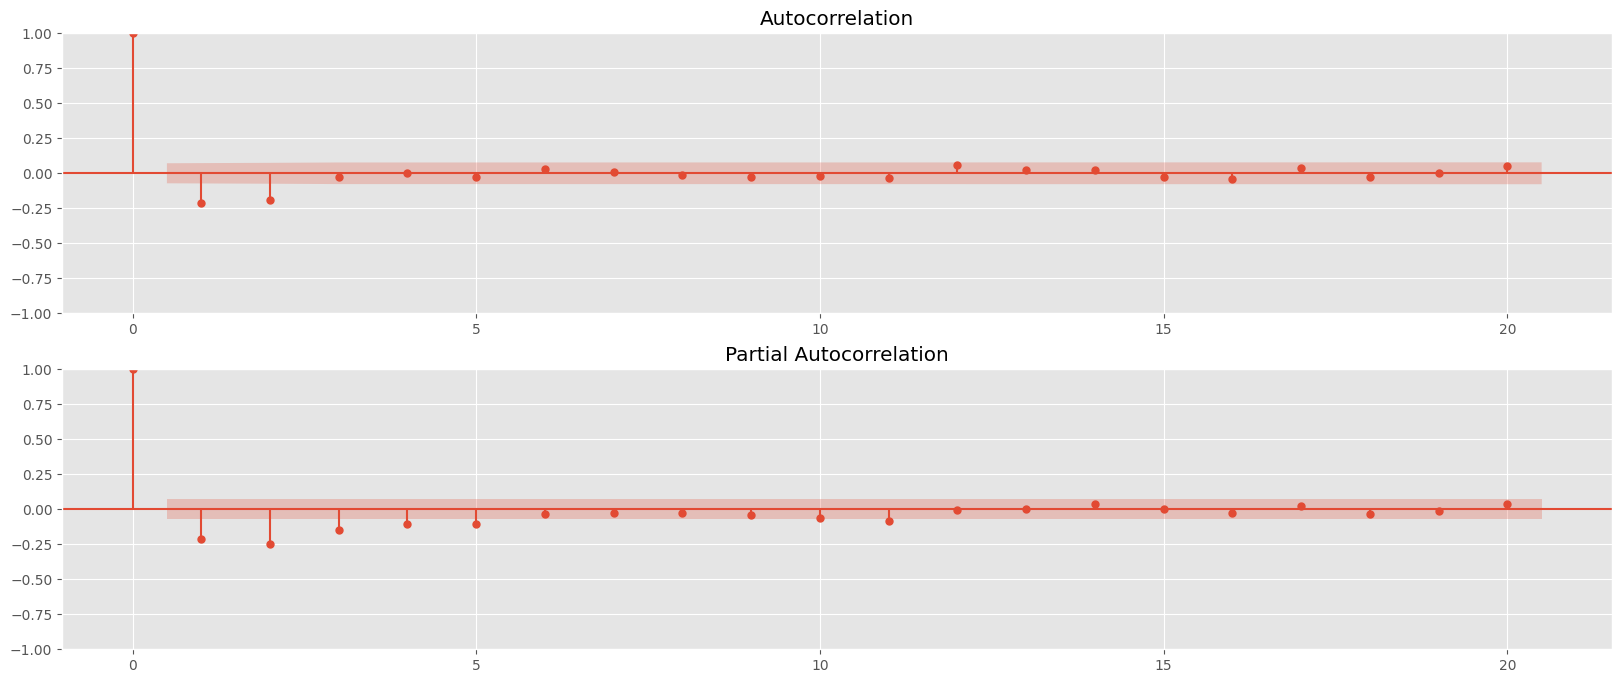

In [52]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags = 20, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags = 20, ax = ax2)

In [53]:
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order = (2, 1, 2))
model_fit = model.fit()

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [54]:
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)

forecast = model_fit.predict(start = start_index, end = end_index, typ = 'levels')

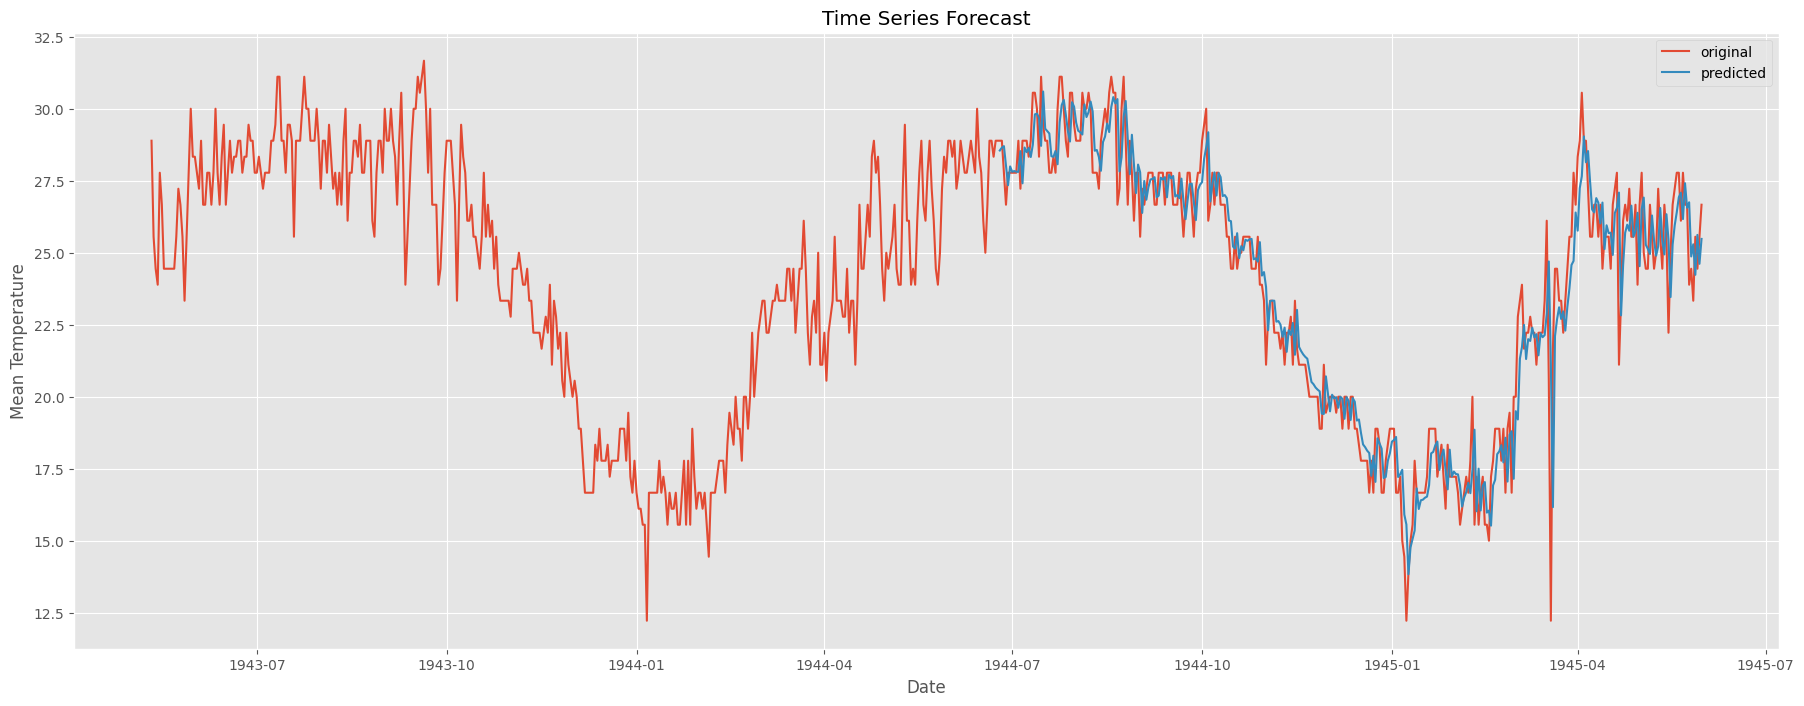

In [56]:
plt.figure(figsize=(22, 8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label='original')
plt.plot(forecast, label='predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
forecast2 = model_fit.predict()
error = mean_squared_error(ts, forecast2)
print('error: ', error)

error:  2.841395329403415


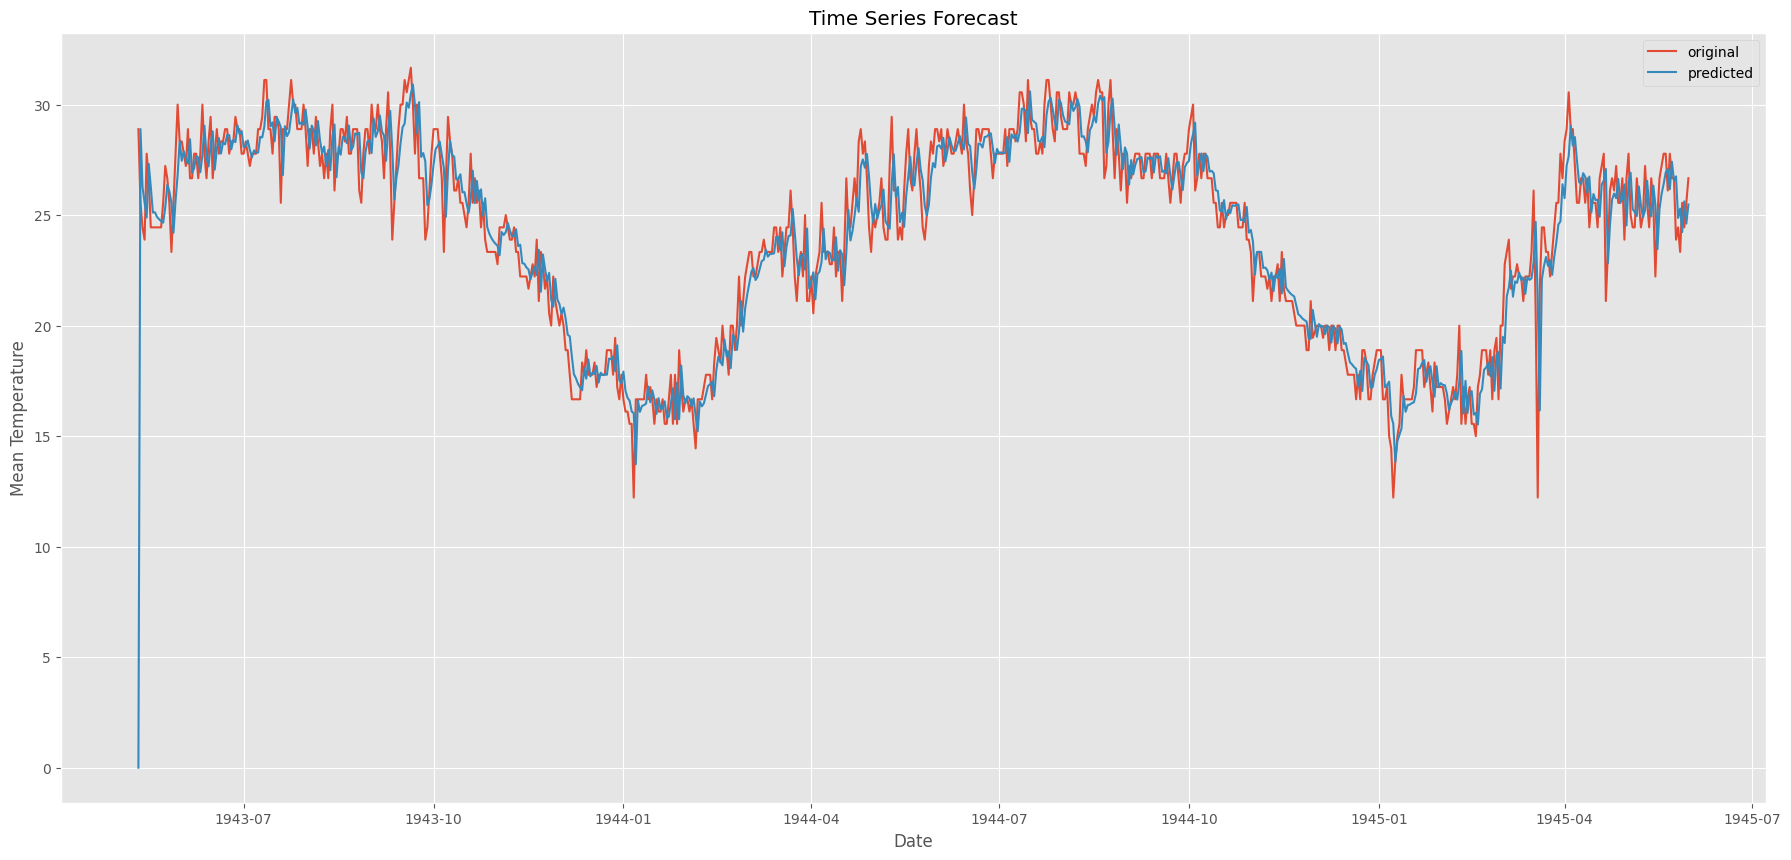

In [58]:
plt.figure(figsize=(22, 10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label='original')
plt.plot(forecast2, label='predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

C:\Users\82102\AppData\Local\Temp\ipykernel_2544\4063228698.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



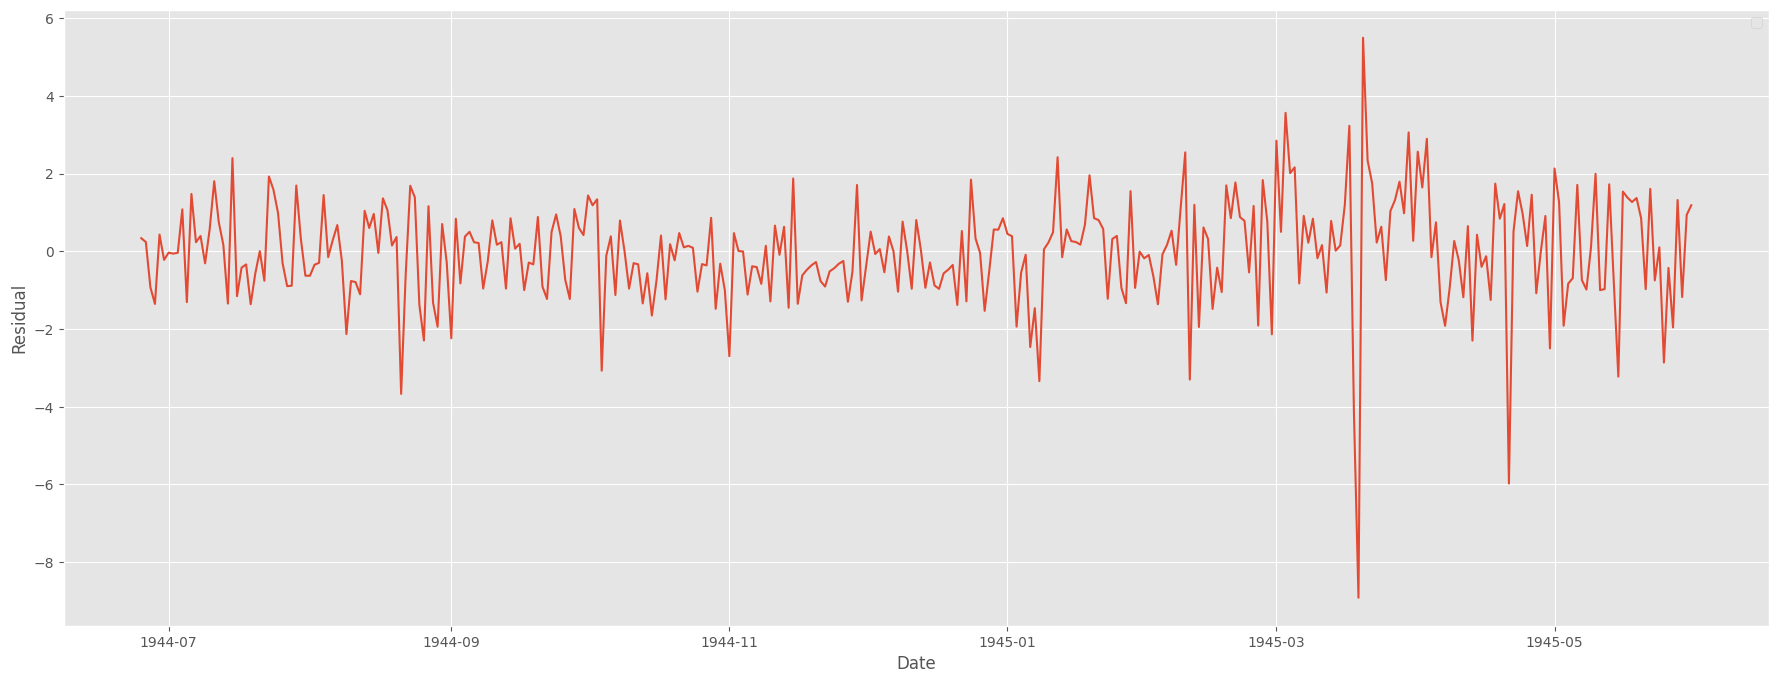

In [59]:
resi = np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp) - np.array(forecast)
plt.figure(figsize=(22, 8))
plt.plot(weather_bin.Date[weather_bin.Date>=start_index], resi)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

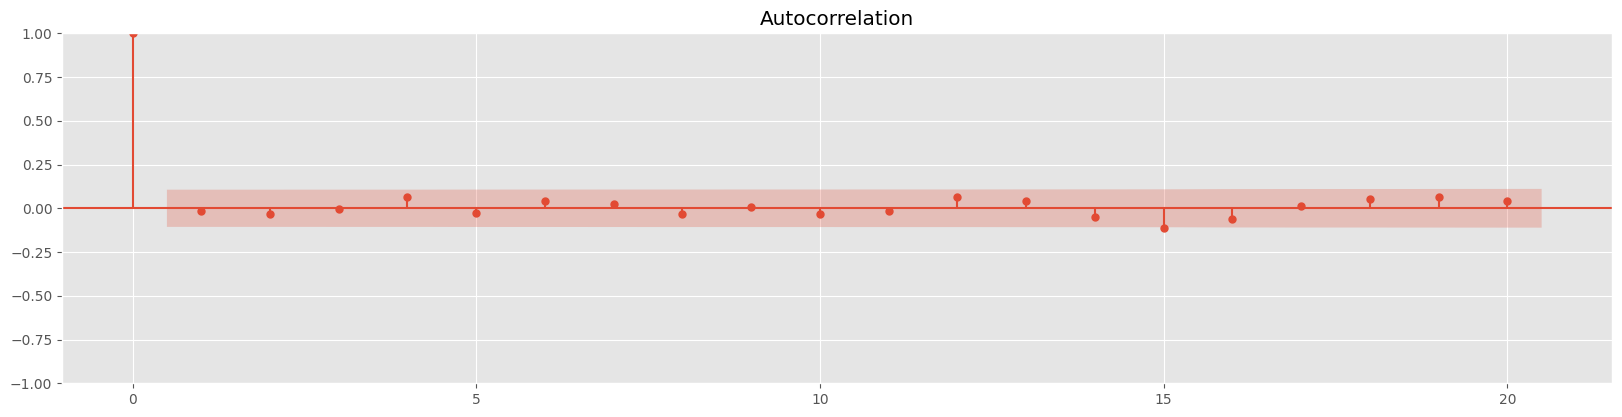

In [60]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags = 20, ax = ax1)

In [61]:
result = adfuller(ts_diff[1:])
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values : ')
for key, value in result[4].items():
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -11.678956
p-value : 0.000000
Critical Values : 
	1% : -3.439
	5% : -2.865
	10% : -2.569
